## Machine Learning Algorithm _ KNeighbors 과제(**고준영**, 박세현, 이동현, 정에녹)
---
### 목차
---
1. [최근접 이웃 알고리즘의 원리](##1.최근접_이웃_알고리즘의_원리)
2. [Normalization](##2.Normalization)
3. [Training & Validation](##3.Training_&_Validation)
4. [kneighborsclassifier](##4.kneighborsclassifier)
5. [Weighted Regression](##5.Weighted_Regression)
6. [kneighborsregressor](##6.kneighborsregressor)

## 1.최근접_이웃_알고리즘의_원리

[목차로 돌아가기](#목차)

**k-NN(k-Nearest Neighbors) 알고리즘**은 머신러닝의 한 방법이며, **데이터셋을 구성하고 있는 각 특성의 거리를 비교하여 예측할 수 있는 알고리즘**이다. 모델의 학습이 굉장이 빠르며, 학습 데이터를 단순히 저장하기 때문에 속도가 빠르다. 데이터 간의 거리 계산을 기본으로 하기 때문에 각 특성 데이터에 대한 스케일 전처리가 필수적이다.

## 2.Kneighborsclassifier

[목차로 돌아가기](#목차)

### 2-1. 라이브러리 import

In [1]:
from sklearn.neighbors import KNeighborsClassifier

### 2-2. 모델 생성

KNeighborsClassifier 모델을 생성하는데, 이 때 n_neighbors로 k를 정한다. (그리고 x 데이터를 분류를 할 때 k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 가중치를 설정하려면 weights = "distance"로 지정한다.)

In [2]:
classifier = KNeighborsClassifier(n_neighbors=3)

### 2-3. 모델 fit()

In [3]:
training_points = [
    [0.5, 0.2, 0.1],
    [0.9,0.7,0.3],
    [0.4,0.5,0.7]
]

training_labels = [0, 1, 1]

classifier.fit(training_points, training_labels)

KNeighborsClassifier(n_neighbors=3)

### 2-4. 모델 predict()

In [4]:
unknown_points= [
    [0.2, 0.1, 0.7],
    [0.4, 0.7, 0.6],
    [0.5, 0.8,0.1]
]

### 2-5. 실전 예제

In [5]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

In [6]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [7]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [9]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3.Normalization

데이터가 가진 feature의 스케일이 심하게 차이가 나는 경우 문제가 발생한다. 따라서 **모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게 정규화(Normalization)의 목표**다.

[목차로 돌아가기](#목차)

### 3-1. Min-Max Normalization (최소-최대 정규화)

데이터를 정규화하는 가장 일반적인 방법이다. **모든 feature에 대해 각각의 최소값 0, 최대값 1로, 그리고 다른 값들은 0과 1사이의 값으로 변환한다.**

수식은 다음과 같다.

**(X-MIN)/(MAX-MIN)**

In [11]:
def min_max_normalize(lst):
  normalized=[]

  for value in lst :
    normalized_num = (value-min(lst))/ (max(lst) - min(lst))
    normalized.append(normalized_num)

  return normalized

그러나 최소-최대 정규화에는 치명적인 단점이 있는데, **이상치(outlier)에 너무 많은 영향을 받는다는 점**이다. 따라서 이러한 단점을 보완하기 위해 Z-점수 정규화를 사용한다.

### 3-2. Z-Score Normalization (Z-점수 정규화)
이상치(outlier)를 피하기 위한 데이터 정규화 전략이다. X라는 값을 Z-점수로 바꿔주는 식은 다음과 같다.

**(X-평균) / 표준편차**

In [12]:
def z_score_normalize(lst):
  normalized= []

  for value in lst:
    normalized_num = (value - np.mean(lst)) / np.std(lst)
    normalized.append(normalized_num)

  return normalized

**Z-점수 정규화는 이상치(outlier)를 잘 처리하지만, 정확히 동일한 척도로 정규화된 데이터를 생성하지는 않는다.**

### 3-3. 실전 예제 df_data에 적용하기

In [13]:
for x in range(len(df_data.columns)):
  df_data[x] = min_max_normalize(df_data[x])

df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4.Training_&_Validation

[목차로 돌아가기](#목차)

가지고 있는 데이터를 모두 사용해서 분류 모델을 만들 수 있지만, 검증을 위해 학습(Training) 세트와 검증(Validation) 세트를 분리한다. 모든 데이터에는 분류된 레이블(Target, Label)이 있으니, 검증 데이터를 예측 모델에 넣어서 실제 그 레이블(정답)을 잘 맞추는지 보기 위함이다.

### 4-1. train_test_split
- 데이터 세트를 나누는 비율을 지정할 수 있는데, 기본값은 0.75:0.25, 즉 3:1이다. 3으로 학습해서 1로 시험을 보는 것이다. 만약 비율을 바꾸고 싶다면 test_size의 값만 0~1 사이로 넣어주면 된다. ex) `test_size = 0.2`

- random_state라는 파라미터도 있는데, 데이터 세트를 나눌 때 난수를 바탕으로 무작위로 나누게 되는데, 이때 난수의 초기값을 고정시켜 주는 기능이다. ex) `random_state = 100`

In [14]:
from sklearn.model_selection import train_test_split

training_data, validation_data, training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.2, random_state= 100)

In [15]:
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(training_labels))

455
114
455
455


### 4-2. 실전 예제 모델 생성 및 정확도

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [17]:
classifier.fit(training_data, training_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [18]:
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


### 4-3. 시각화

k값을 1부터 100까지 바꿔가며 모델 정확도를 구해놓고 시각화한다.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

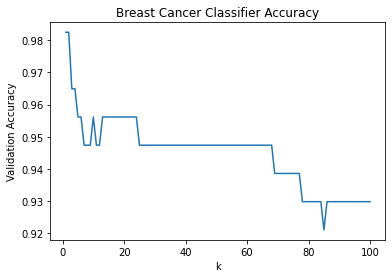

In [19]:
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

## 5.kneighborsregressor

[목차로 돌아가기](#목차)

가까운 이웃들의 단순한 평균을 구하는 게 아니라 각 이웃이 얼마나 가까이 있는지에 따라 가중 평균(Weighted Average)를 구한다. 

### 5-1. 라이브러리 Import

In [20]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsRegressor

### 5-2. 회귀 모델 생성

회귀 모델 생성 시,**n_neighbors(=k)**를 정의해야 한다. **가중평균을 적용하기 위해서는 weights = "distance"를 넣어준다.** (만약 weight의 기본값(default)를 쓴다면 "uniform"이 적용되며, 단순한 평균을 계산한다.)

In [23]:
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

### 5-3. 모델 fit() 및 학습 데이터 생성

학습 데이터는 여러 개의 차원으로 이루어진 배열(점들의 집합)이 되고, y 데이터는 레이블(각 점들의 분류 결과)가 된다.

In [24]:
X, y =mglearn.datasets.make_wave(n_samples=50)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state= 0)

regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

### 5-4. 새로운 값을 predict()를 통해 분류

In [25]:
guesses = regressor.predict(X_test)

테스트 세트 예측 :  [ 0.65175839 -0.10783153 -0.63177627  0.21069248  0.01944069  0.36060787
 -0.30949153 -1.01178308  0.25924935 -1.85070841  0.81125958  1.55787118
 -0.98723875]
점수 (R제곱값) :  0.802547


Text(0, 0.5, 'target')

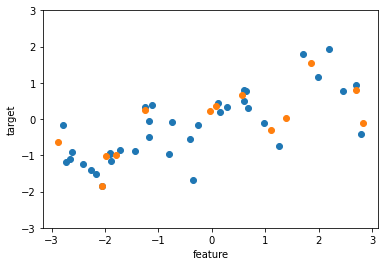

In [28]:
print("테스트 세트 예측 : ", guesses)
print("점수 (R제곱값) :  %2f" %regressor.score(X_test, y_test))
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, guesses, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

### 5-5. 단순 평균일 때

In [29]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsRegressor

In [30]:
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "uniform") # weights 방법이 바뀜.

In [31]:
X, y =mglearn.datasets.make_wave(n_samples=50)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state= 0)

regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [32]:
guesses = regressor.predict(X_test)

테스트 세트 예측 :  [ 0.68896417  0.43848302 -0.81522381  0.1651502   0.31821632  0.32709629
 -0.17612523 -1.02098696 -0.07009828 -1.43420766  0.43848302  1.62632353
 -0.99456101]
점수 (R제곱값) :  0.811371


Text(0, 0.5, 'target')

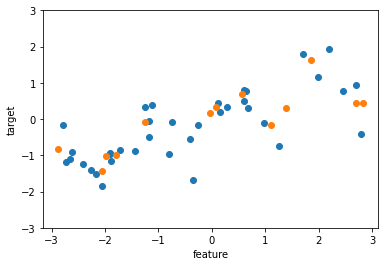

In [33]:
print("테스트 세트 예측 : ", guesses)
print("점수 (R제곱값) :  %2f" %regressor.score(X_test, y_test))
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, guesses, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")